# Estudio sobre la COVID-19 en México

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [2]:
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

In [3]:
df = pd.read_csv('200504COVID19MEXICO.csv', encoding='ISO-8859-1')

## Parte 2 del proyecto (datos)

### 1. Hallamos el número de pacientes cuyo resultado en la prueba ha sido positivo:

In [4]:
positivos=len(df[df['RESULTADO']==1])
print("Resultados positivos: ",positivos)

Resultados positivos:  24905


### 2. Hallamos el número de pacientes cuyo resultado en la prueba ha sido negativo:

In [5]:
negativos=len(df[df['RESULTADO']==2])
print("Resultados negativos: ",negativos)

Resultados negativos:  61993


### 3. Hallamos el número de pacientes que han sido ingresados en la UCI:

In [6]:
uci=len(df[(df["RESULTADO"]==1)&(df["UCI"]==1)])
print("Pacientes ingresados en la UCI: ",uci)

Pacientes ingresados en la UCI:  1015


### 4. Hallamos el número de pacientes que han fallecido:

In [7]:
fallecidos=pd.DataFrame(df[(df["FECHA_DEF"]!="9999-99-99")])
difuntos=fallecidos["FECHA_DEF"].count()
print("Pacientes que han fallecido: ",difuntos)

Pacientes que han fallecido:  3580


### 5. Hallamos el número de pacientes que han dado positivo y que no padecen otras enfermedades:

In [8]:
%%time
enf = df.iloc[:, 19:29].sum(axis=1) == 20
df.loc[enf, 'SANO']= 'SANO'
df.loc[~enf, 'SANO']='ENFERMO'

Wall time: 50.9 ms


In [9]:
df.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI,SANO
0,04/05/2020,1ab4e5,2,3,25,2,25,25,6,2,06/04/2020,31/03/2020,10/04/2020,1,1,42,1,97,2,1,2,2,2,1,2,2,1,2,2,2,1,99,MÃ©xico,99,2,ENFERMO
1,04/05/2020,0cc140,2,3,15,1,28,15,20,1,10/04/2020,05/04/2020,9999-99-99,97,2,61,1,2,2,2,2,2,2,1,2,2,2,2,2,1,1,99,MÃ©xico,99,97,ENFERMO
2,04/05/2020,0e0689,2,3,27,1,27,27,4,1,13/04/2020,11/04/2020,9999-99-99,97,2,32,1,2,2,2,2,2,2,2,2,2,2,2,2,2,1,99,MÃ©xico,99,97,SANO
3,04/05/2020,1b81dc,2,3,2,1,8,2,4,1,13/04/2020,09/04/2020,9999-99-99,97,2,33,1,2,2,2,2,2,2,2,2,2,2,2,2,1,1,99,MÃ©xico,99,97,SANO
4,04/05/2020,0b7b4d,2,3,27,2,27,27,3,2,13/04/2020,05/04/2020,14/04/2020,2,1,63,1,97,2,2,2,2,2,1,2,2,1,1,2,2,1,99,MÃ©xico,99,2,ENFERMO


In [10]:
posnoenf=len(df[(df['RESULTADO']==1) & (df['SANO']=='SANO')])
print("Número de casos positivos sin enfermedades previas: ",posnoenf)

Número de casos positivos sin enfermedades previas:  11719


### 6. Hallamos el número de pacientes que han fallecido (que dieron positivo) y que no padecían otras enfermedades:

In [11]:
df.loc[df['FECHA_DEF']=='9999-99-99', 'FECHA_DEF'] = pd.NaT
posfallnoenf=len(df[(df['RESULTADO']==1) & (df['SANO']=='SANO') & (df['FECHA_DEF'].notna())])
print("Número de pacientes fallecidos sin enfermedades previas: ",posfallnoenf)

Número de pacientes fallecidos sin enfermedades previas:  501


### 7. Calculamos el promedio del tiempo transcurrido entre la fecha de aparición de los síntomas de la enfermedad y la fecha de defunción de las personas que dieron positivo: 

In [12]:
fechas = ['FECHA_ACTUALIZACION', 'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF']
for i in fechas:
    df[i] = pd.to_datetime(df[i], format ='%d/%m/%Y')

In [13]:
df['TIMEDELTA'] = df['FECHA_DEF'] - df['FECHA_SINTOMAS']
df.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI,SANO,TIMEDELTA
0,2020-05-04,1ab4e5,2,3,25,2,25,25,6,2,2020-04-06,2020-03-31,2020-04-10,1,1,42,1,97,2,1,2,2,2,1,2,2,1,2,2,2,1,99,MÃ©xico,99,2,ENFERMO,10 days
1,2020-05-04,0cc140,2,3,15,1,28,15,20,1,2020-04-10,2020-04-05,NaT,97,2,61,1,2,2,2,2,2,2,1,2,2,2,2,2,1,1,99,MÃ©xico,99,97,ENFERMO,NaT
2,2020-05-04,0e0689,2,3,27,1,27,27,4,1,2020-04-13,2020-04-11,NaT,97,2,32,1,2,2,2,2,2,2,2,2,2,2,2,2,2,1,99,MÃ©xico,99,97,SANO,NaT
3,2020-05-04,1b81dc,2,3,2,1,8,2,4,1,2020-04-13,2020-04-09,NaT,97,2,33,1,2,2,2,2,2,2,2,2,2,2,2,2,1,1,99,MÃ©xico,99,97,SANO,NaT
4,2020-05-04,0b7b4d,2,3,27,2,27,27,3,2,2020-04-13,2020-04-05,2020-04-14,2,1,63,1,97,2,2,2,2,2,1,2,2,1,1,2,2,1,99,MÃ©xico,99,2,ENFERMO,9 days


In [14]:
df.loc[df['RESULTADO']==1, 'TIMEDELTA'].mean()

Timedelta('10 days 03:40:45.462555')

El tiempo medio transcurrido entre la fecha de aparición de los síntomas y la fecha de fallecimiento son 10 días.

### 8. ¿Cuál es la enfermedad con mayor prevalencia entre los pacientes que han dado positivo?

In [15]:
epoc2=pd.DataFrame(df[(df["EPOC"]==1)&(df["RESULTADO"]==1)]["EPOC"].value_counts())
asma2=pd.DataFrame(df[(df["ASMA"]==1)&(df["RESULTADO"]==1)]["ASMA"].value_counts())
diabetes2=pd.DataFrame(df[(df["DIABETES"]==1)&(df["RESULTADO"]==1)]["DIABETES"].value_counts())
hipertensión2=pd.DataFrame(df[(df["HIPERTENSION"]==1)&(df["RESULTADO"]==1)]["HIPERTENSION"].value_counts())
obesidad2=pd.DataFrame(df[(df["OBESIDAD"]==1)&(df["RESULTADO"]==1)]["OBESIDAD"].value_counts())
tabaquismo2=pd.DataFrame(df[(df["TABAQUISMO"]==1)&(df["RESULTADO"]==1)]["TABAQUISMO"].value_counts())
inmunosupresores2=pd.DataFrame(df[(df["INMUSUPR"]==1)&(df["RESULTADO"]==1)]["INMUSUPR"].value_counts())
cardiovascular2=pd.DataFrame(df[(df["CARDIOVASCULAR"]==1)&(df["RESULTADO"]==1)]["CARDIOVASCULAR"].value_counts())
renal_crónica2=pd.DataFrame(df[(df["RENAL_CRONICA"]==1)&(df["RESULTADO"]==1)]["RENAL_CRONICA"].value_counts())
otras_enf2=pd.DataFrame(df[(df["OTRA_COM"]==1)&(df["RESULTADO"]==1)]["OTRA_COM"].value_counts())
dolencias_previas2=pd.DataFrame(pd.concat([epoc2,asma2,diabetes2,hipertensión2,obesidad2,tabaquismo2,inmunosupresores2,cardiovascular2,renal_crónica2,otras_enf2], axis=1))
dolencias_previas2.rename(columns={'HIPERTENSION':'HIPERTENSIÓN','INMUSUPR':'INMUNOSUPRESIÓN','RENAL_CRONICA':'RENAL CRÓNICA','OTRA_COM':'OTRAS ENFERMEDADES'}, index={2:'No',1:' '}, inplace=True)
dolencias_previas2

,EPOC,ASMA,DIABETES,HIPERTENSIÓN,OBESIDAD,TABAQUISMO,INMUNOSUPRESIÓN,CARDIOVASCULAR,RENAL CRÓNICA,OTRAS ENFERMEDADES
,610,828,4653,5450,5272,2212,445,718,622,965


La enfermedad con mayor prevalencia entre los pacientes que han dado positivo es la hipertensión.

### 9. ¿Cuál es la enfermedad con menor prevalencia entre los pacientes que han dado positivo? 

La enfermedad con menor prevalencia entre los pacientes que han dado positivo es la inmunosupresión.

### 10. ¿El número de pacientes intubados coincide con el número de pacientes ingresados en la UCI?

In [16]:
df[['UCI', 'INTUBADO']].head()

uci = len(df[df['UCI']==1])
intubado = len(df[df['INTUBADO']==1])
print('UCI: ', uci,'/', 'INTUBADO: ',  intubado)

UCI:  2250 / INTUBADO:  2001


No, no todos los pacientes que han requerido ingreso en la UCI han sido intubados.

## Parte 2 del proyecto (gráficos) 

### 1.	Elaboramos un gráfico con el número de personas que han dado positivo por estado:

In [17]:
dfm = pd.read_csv("CoordMunicipios.csv", encoding = "ISO-8859-1")
dfe = pd.read_csv("CoordEstados.csv", encoding = "ISO-8859-1")

In [18]:
positivos=df[(df["RESULTADO"]==1)]
No_positivos=df[(df["RESULTADO"]!=1)]

Preparación de la base de datos.

In [19]:
positivos = positivos.loc[:,['ID_REGISTRO','ENTIDAD_UM','SEXO','ENTIDAD_RES','MUNICIPIO_RES','EDAD','RESULTADO','UCI']]
positivos['Clave Estado']=positivos['ENTIDAD_RES']
positivos_geo = pd.merge(positivos,dfe, on='Clave Estado')
positivos_geo2=positivos_geo.groupby(by='Estado').count()['RESULTADO'].sort_values(ascending=False).reset_index()

Creación del gráfico.

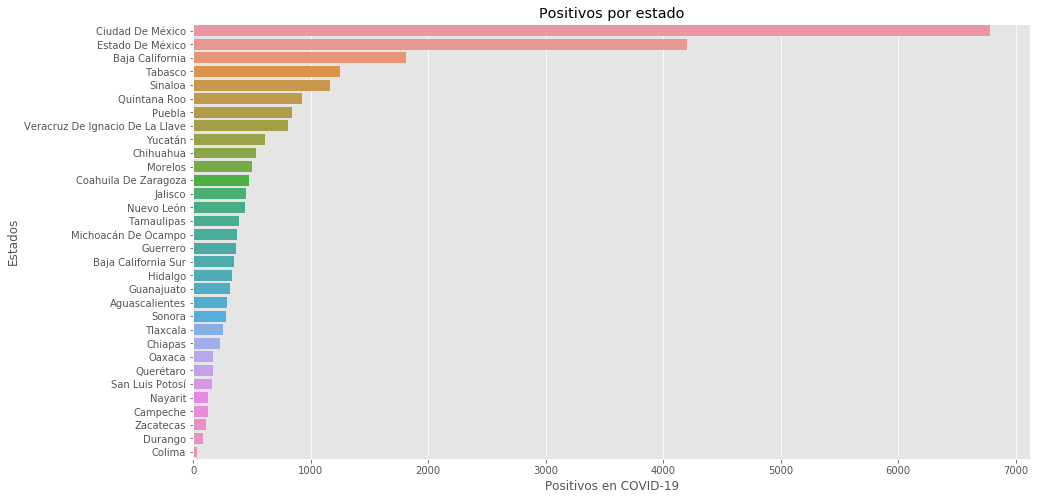

In [20]:
plt.rcParams['font.size']=25
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(15,8))
chart=sns.barplot(positivos_geo2["RESULTADO"],positivos_geo2["Estado"])
plt.xlabel("Positivos en COVID-19")
plt.ylabel("Estados")
plt.title("Positivos por estado")
plt.show()

### 2. Elaboramos un gráfico con el número de personas que han dado negativo por estado:

Segmentación de los datos en función de los negativos y el estado de residencia.

In [21]:
No_positivos = No_positivos.loc[:,['ID_REGISTRO','ENTIDAD_UM','SEXO','ENTIDAD_RES','MUNICIPIO_RES','EDAD','RESULTADO','UCI']]
No_positivos['Clave Estado']=No_positivos['ENTIDAD_RES']
No_positivos_geo = pd.merge(No_positivos,dfe, on='Clave Estado')
No_positivos_geo2=No_positivos_geo.groupby(by='Estado').count()['RESULTADO'].sort_values(ascending=False).reset_index()

Creación del gráfico.

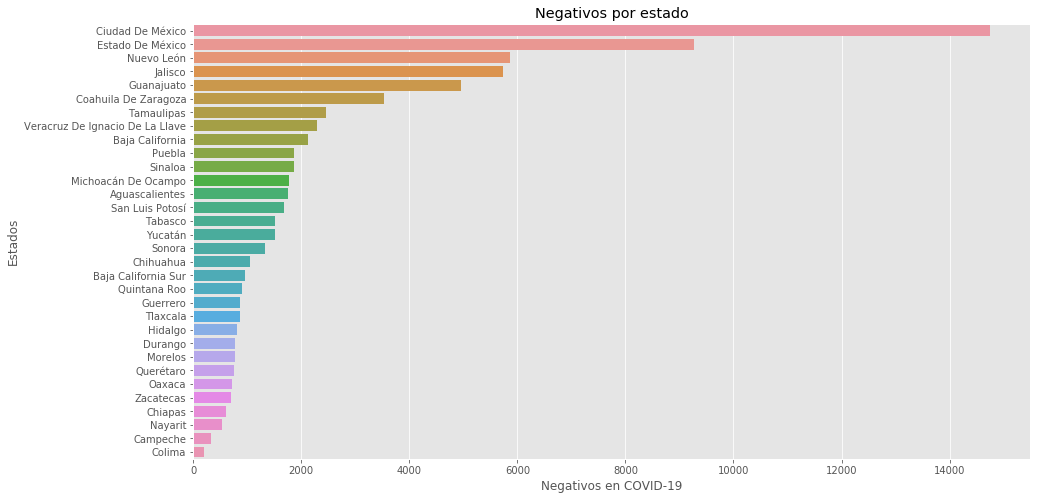

In [22]:
plt.rcParams['font.size']=25
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(15,8))
chart=sns.barplot(No_positivos_geo2["RESULTADO"],No_positivos_geo2["Estado"])
plt.xlabel("Negativos en COVID-19")
plt.ylabel("Estados")
plt.title("Negativos por estado")
plt.show()

### 3. Elaboramos un gráfico donde aparezca el municipio de cada estado con mayor número de positivos:

Preparación de las bases.

In [23]:
dfm.columns = ["Clave Estado","Estado","Clave Municipio","Municipio","Latitud Municipio",'Longitud Municipio','Error']

Combinación de las bases.

In [24]:
positivos['Clave Municipio']=positivos['MUNICIPIO_RES']
positivos_mun = pd.merge(positivos,dfm, on=['Clave Municipio','Clave Estado'],how='left')

Agrupación de las bases y selección del municipio con más casos positivos de cada estado.

In [25]:
grouped=positivos_mun.groupby(['Estado','Municipio']).count()['RESULTADO'].sort_values(ascending=False).reset_index()
grouped.drop_duplicates('Estado', keep='first',inplace=True)

Creación del gráfico.

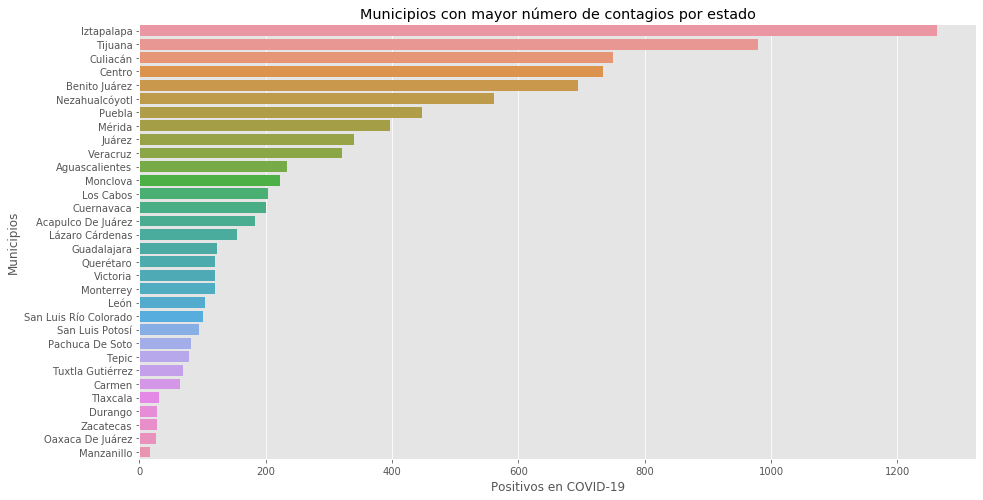

In [26]:
plt.rcParams['font.size']=25
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(15,8))
chart=sns.barplot(grouped["RESULTADO"],grouped["Municipio"])
plt.xlabel("Positivos en COVID-19")
plt.ylabel("Municipios")
plt.title("Municipios con mayor número de contagios por estado")
plt.show()

### 4.	Elaboramos dos gráficos en función del sexo de los casos positivos con la distribución por edad:

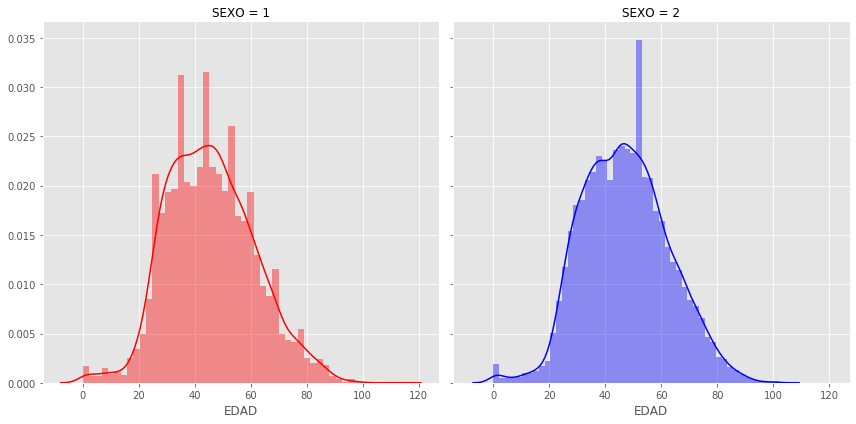

In [27]:
plt.rcParams['font.size']=10
grafica = sns.FacetGrid(data=positivos, col = "SEXO",hue='SEXO',palette=['red','blue'], height=6, aspect=1)
grafica.map(sns.distplot, "EDAD")
plt.show()

### 5.	Elaboramos dos gráficos en función del sexo de los casos negativos con la distribución por edad:

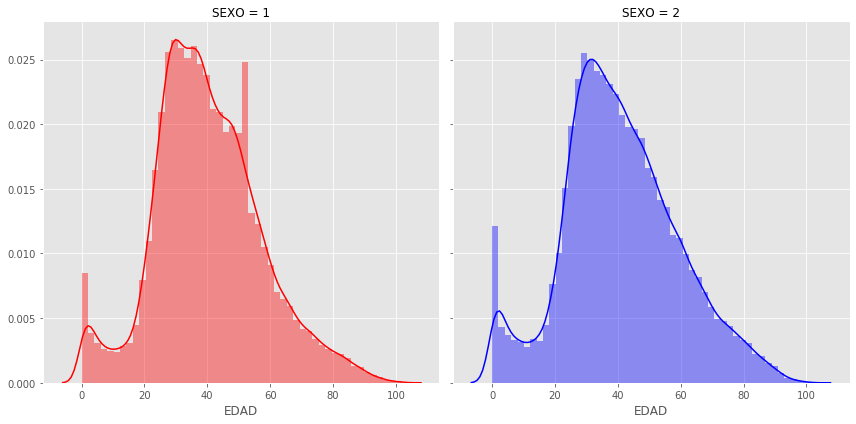

In [28]:
plt.rcParams['font.size']=10
grafica = sns.FacetGrid(data=No_positivos, col = "SEXO",hue='SEXO',palette=['red','blue'], height=6, aspect=1)
grafica.map(sns.distplot, "EDAD")
plt.show()

### 6. Elaboramos dos gráficos en función del sexo de los fallecidos con la distribución por edad:

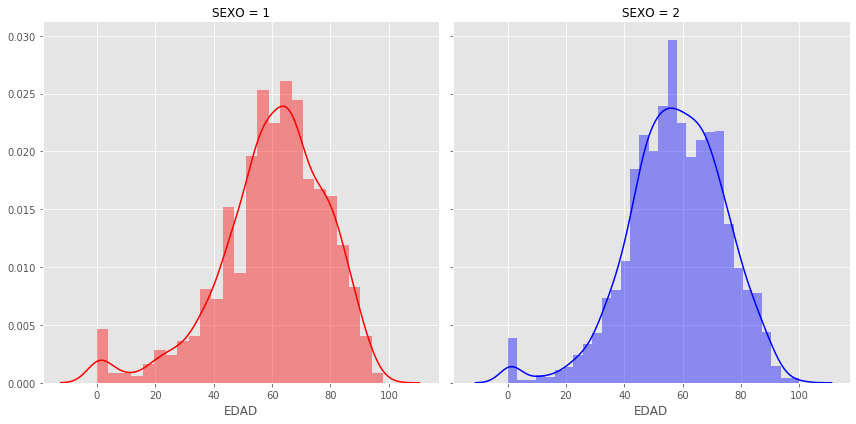

In [29]:
muertos=df[df['FECHA_DEF'].notna()]
plt.rcParams['font.size']=10
grafica = sns.FacetGrid(data=muertos, col = "SEXO",hue='SEXO',palette=['red','blue'], height=6, aspect=1)
grafica.map(sns.distplot, "EDAD")
plt.show()

### 7. Elaboramos un mapa donde agregamos un texto emergente con el número de positivos en cada estado:

Creación de bases agrupadas.

In [30]:
positivos_geo_agrup=positivos_geo.groupby(['Estado'])
positivos_geo_agrup=pd.DataFrame(positivos_geo_agrup.size().reset_index(name = "Group_Count"))
positivos_geo_latlong=positivos_geo[['Estado','Latitud','Longitud']]
positivos_geo_agrup = pd.merge(positivos_geo_agrup,positivos_geo_latlong, on='Estado')
positivos_unicos=positivos_geo_agrup.drop_duplicates(subset=['Estado','Group_Count','Latitud','Longitud'],keep='first')

In [31]:
positivos_geo_agrup=positivos_geo.groupby(['Estado'])
positivos_geo_agrup=pd.DataFrame(positivos_geo_agrup.size().reset_index(name = "Group_Count"))
positivos_geo_agrup

,Estado,Group_Count
0,Aguascalientes,286
1,Baja California,1808
2,Baja California Sur,344
3,Campeche,122
4,Chiapas,231
5,Chihuahua,532
6,Ciudad De México,6785
7,Coahuila De Zaragoza,476
8,Colima,30
9,Durango,80


In [32]:
positivos_geo.head()

,ID_REGISTRO,ENTIDAD_UM,SEXO,ENTIDAD_RES,MUNICIPIO_RES,EDAD,RESULTADO,UCI,Clave Estado,Estado,Latitud,Longitud,Error
0,1ab4e5,25,2,25,6,42,1,2,25,Sinaloa,25.0000001,-107.5000001,ok
1,1448c7,25,2,25,6,45,1,2,25,Sinaloa,25.0000001,-107.5000001,ok
2,73442,25,1,25,6,50,1,2,25,Sinaloa,25.0000001,-107.5000001,ok
3,07589e,25,2,25,6,47,1,97,25,Sinaloa,25.0000001,-107.5000001,ok
4,07eb77,25,2,25,6,32,1,2,25,Sinaloa,25.0000001,-107.5000001,ok


Modificación de los tipos de datos.

In [33]:
positivos_unicos['Latitud'] = positivos_unicos['Latitud'].astype(float)
positivos_unicos['Longitud'] = positivos_unicos['Longitud'].astype(float)
positivos_unicos['Group_Count'] = positivos_unicos['Group_Count'].astype(str)

Creación del mapa.

In [34]:
latitud = 23.6345005
longitud= -102.5527878
Mexico_map = folium.Map(location=[latitud, longitud], zoom_start=5)
Mexico_map


Infectados = folium.map.FeatureGroup()

for lat, lng, Group_Count in zip(positivos_unicos.Latitud, positivos_unicos.Longitud,positivos_unicos.Group_Count):
    Infectados.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # difine el tamaño de los circulos
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

Incorporación del texto emergente.

In [35]:
Latitud = list(positivos_unicos.Latitud)
Longitud = list(positivos_unicos.Longitud)
labels = list(positivos_unicos.Group_Count)

for lat, lng, label in zip(Latitud, Longitud, labels):
    folium.Marker([lat, lng], popup=label).add_to(Mexico_map)

Incorporación de incidentes al mapa.

In [36]:
Mexico_map.add_child(Infectados)

### 8. Elaboramos un choromap para ver el número de positivos en cada estado por colores:

Modificación de los tipos de datos.

In [37]:
positivos_unicos['Latitud'] = positivos_unicos['Latitud'].astype(float)
positivos_unicos['Longitud'] = positivos_unicos['Longitud'].astype(float)
positivos_unicos['Group_Count'] = positivos_unicos['Group_Count'].astype(float)

Creación del mapa.

In [38]:
Mexico_map = folium.Map(location=[23.0000000, -102.0000000], zoom_start=5)
mexico_json= 'mexico.json'
Mexico_map.choropleth(
    geo_data=mexico_json,
    data=positivos_unicos,
    columns=['Estado', 'Group_Count'],
    key_on='feature.properties.name',
     fill_color='Spectral',
     fill_opacity=0.5,
     line_opacity=0.2,
     legend_name='Infectados por COVID-19',
     threshold_scale=[100,500,1500,3000,5000,7000],
)
Mexico_map